In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(["Model"], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


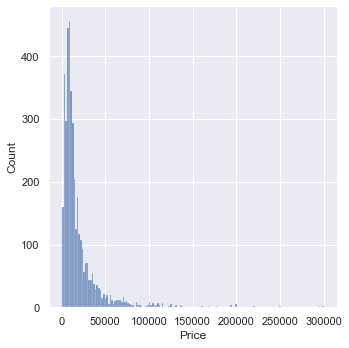

In [8]:
sns.displot(data_no_mv['Price'])

### Dealing with outliers

In [9]:
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"] < q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


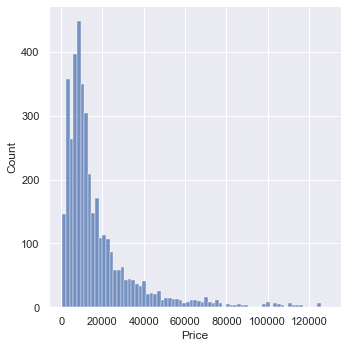

In [10]:
sns.displot(data_1["Price"]);

In [11]:
q = data_1["Price"].quantile(0.99)
data_2 = data_1[data_1["Mileage"] < q]
data_2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [12]:
data_3 = data_2[data_2['EngineV'] < 6.5]

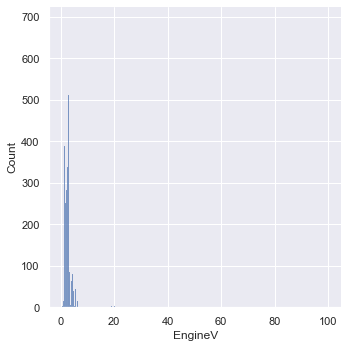

In [13]:
sns.displot(data_2["EngineV"])

In [14]:
q = data_3["Year"].quantile(0.99)
data_4 = data_3[data_3["Year"] < q]

In [15]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3775,3775.000000,3775,3775.000000,3775.000000,3775,3775,3775.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,844,NaN,1470,NaN,NaN,1722,3410,NaN
mean,NaN,15874.075335,NaN,172.986225,2.445971,NaN,NaN,2005.830728
std,NaN,15468.397080,NaN,98.576161,0.949582,NaN,NaN,6.470733
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,102.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,164.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19500.000000,NaN,235.000000,3.000000,NaN,NaN,2011.000000


## Check OLS assumptions

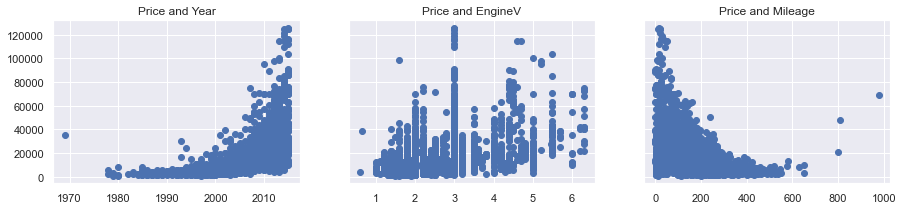

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

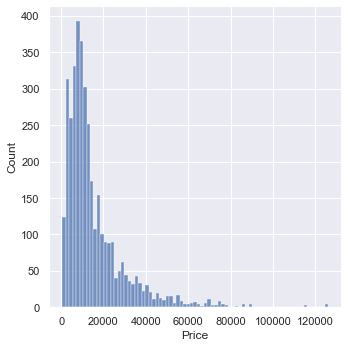

In [17]:
sns.displot(data_cleaned["Price"])

In [18]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3770,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3771,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3772,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
3773,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197


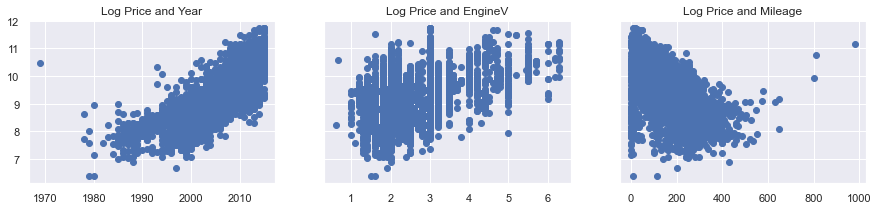

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [20]:
data_cleaned = data_cleaned.drop(["Price"], axis=1)

In [21]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [23]:
vif

,VIF,features
0,4.052010,Mileage
1,10.689391,Year
2,7.638053,EngineV


In [24]:
data_no_multicollinearity = data_cleaned.drop(["Year"], axis=1)

## Create dummy variables

In [25]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [26]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3771,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3772,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3773,194,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Rearrange a bit

In [27]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [28]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [29]:
data_preprocessed = data_with_dummies[cols]

In [30]:
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3771,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3772,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3773,8.987197,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Declare the inputs and the targets

In [35]:
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"], axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [37]:
inputs_scaled = scaler.transform(inputs)

### Train test split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [39]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [40]:
y_hat = reg.predict(X_train)

In [41]:
y_hat

array([ 9.07515573,  8.85464374, 10.59391638, ...,  9.53412852,
        9.68026784,  8.59453552])

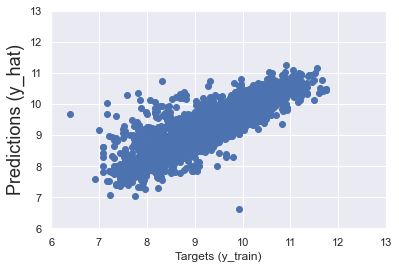

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)")
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

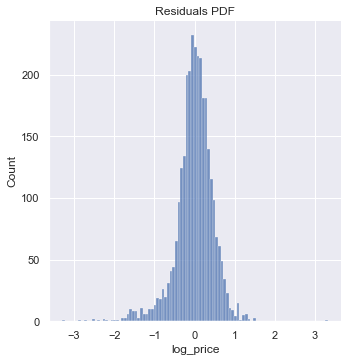

In [44]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF");

In [46]:
reg.score(X_train, y_train)

0.6897508719112904

In [47]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.411541
1,EngineV,0.233481
2,Brand_BMW,0.024146
3,Brand_Mercedes-Benz,0.005303
4,Brand_Mitsubishi,-0.121613
5,Brand_Renault,-0.163307
6,Brand_Toyota,-0.036315
7,Brand_Volkswagen,-0.069770
8,Body_hatch,-0.142278
9,Body_other,-0.095353


In [48]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [50]:
y_hat_test = reg.predict(X_test)

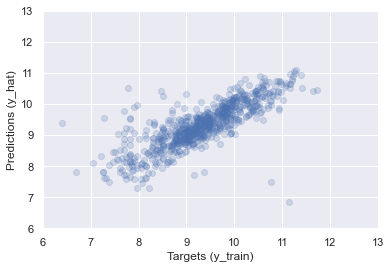

In [52]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_train)")
plt.ylabel("Predictions (y_hat)")
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [60]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])
df_pf.head()

,Prediction
0,21286.285116
1,30305.936648
2,16901.712063
3,5849.333396
4,6212.105976


In [61]:
df_pf["Target"] = np.exp(y_test)
df_pf

,Prediction,Target
0,21286.285116,35000.0
1,30305.936648,35999.0
2,16901.712063,24800.0
3,5849.333396,4000.0
4,6212.105976,6700.0
...,...,...
750,25642.008288,21500.0
751,18767.136928,22500.0
752,12922.286393,18300.0
753,17738.121212,15500.0


In [56]:
y_test = y_test.reset_index(drop=True)

In [57]:
y_test.head()

0    10.463103
1    10.491246
2    10.118599
3     8.294050
4     8.809863
Name: log_price, dtype: float64

In [64]:
df_pf["Target"] = np.exp(y_test)
df_pf

,Prediction,Target
0,21286.285116,35000.0
1,30305.936648,35999.0
2,16901.712063,24800.0
3,5849.333396,4000.0
4,6212.105976,6700.0
...,...,...
750,25642.008288,21500.0
751,18767.136928,22500.0
752,12922.286393,18300.0
753,17738.121212,15500.0


In [66]:
df_pf["Residual"] = df_df["Target"] - df_df["Prediction"]
df_pf["Residual"]

0      13713.714884
1       5693.063352
2       7898.287937
3      -1849.333396
4        487.894024
           ...     
750    -4142.008288
751     3732.863072
752     5377.713607
753    -2238.121212
754      923.501041
Name: Residual, Length: 755, dtype: float64

In [67]:
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"] * 100)

In [68]:
df_pf

,Prediction,Target,Residual,Difference%
0,21286.285116,35000.0,13713.714884,39.182043
1,30305.936648,35999.0,5693.063352,15.814504
2,16901.712063,24800.0,7898.287937,31.847935
3,5849.333396,4000.0,-1849.333396,46.233335
4,6212.105976,6700.0,487.894024,7.282000
...,...,...,...,...
750,25642.008288,21500.0,-4142.008288,19.265155
751,18767.136928,22500.0,3732.863072,16.590503
752,12922.286393,18300.0,5377.713607,29.386413
753,17738.121212,15500.0,-2238.121212,14.439492


In [69]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,755.000000,755.000000,755.000000,755.000000
mean,14239.487094,15995.364530,1755.877435,44.222480
std,10431.710566,15318.320971,9337.624903,112.282107
min,936.666177,600.000000,-34706.956904,0.013608
25%,7255.549811,6550.000000,-1939.391622,9.912166
50%,11252.470330,11000.000000,174.116674,23.518719
75%,18249.044168,19800.000000,2933.900548,40.898885
max,65133.819515,125000.000000,90145.810937,1907.719036


In [71]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by="Difference%")

,Prediction,Target,Residual,Difference%
527,8948.78,8950.00,1.22,0.01
291,6204.89,6200.00,-4.89,0.08
582,10385.35,10396.23,10.88,0.10
361,2669.81,2666.00,-3.81,0.14
716,12780.61,12800.00,19.39,0.15
336,12925.90,12900.00,-25.90,0.20
662,13569.52,13600.00,30.48,0.22
681,12466.83,12500.00,33.17,0.27
561,8525.60,8500.00,-25.60,0.30
565,19082.10,18990.00,-92.10,0.48
